# Project: No-show Appointments Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The current No-show Appointments dataset contains over 110,000 medical appointments from Brazilian hospitals. The purpose of this data analysis is to evaluate the factors contributing to why patients fail to attend their scheduled appointments and to compare the findings with patients that do attend their scheduled appointments. 

> The No-show Appointments dataset starts with **110,257** individual entries and **14** columns. The **14** columns are the characteristics that we are analyzing to determine why patients attend or fail to attend their scheduled appointments. 

>**Columns and Descriptions:**
1. PatientId: Patients' identification.
2. AppointmentID: Appointment Identification number.
3. Gender: Female or Male.
4. ScheduledDay: The date someone scheduled the initial appointment.
5. AppointmentDay: The date of the actual hospital appointment.
6. Age:	The patients' age.
7. Neighbourhood: The location of the hospital. 
8. Scholarship: The Bolsa Familia welfare program (True or False)
9. Hipertension: (True or False)
10. Diabetes: (True or False)
11. Alcoholism: (True or False)
12. Handcap: (True or False)
13. SMS_received: Reminder text	message (True or False)
14. No-show: (Yes or No) *

> * Number 14, the No-Show column: a "Yes" indicates the patient did **NOT** show up to their appointment, and a "No" indicates the patient **DID** show up to their appointment.


### Question(s) for Analysis

> 1. Does gender play a role in no-shows, and if so, which gender is more likely to fail to attend their scheduled appointments?
2. Does age affect the rates of no-shows? Are elderly patients less likely to attend their appointments, or are younger patients less likely? Is there an intersection between age and gender that affects the outcomes of no-shows?
3. Does scholarship (enrollment in the Bolsa Familia social welfare program) affect the likelihood of no-shows, and does the intersection of gender and scholarship play a role?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In [193]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

data = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [194]:
data.shape
print(f'General description:\nThere are {data.shape[0]} rows and {data.shape[1]} columns in the dataset.')


General description:
There are 110527 rows and 14 columns in the dataset.


Confirming the 14 columns and their data types. There are 110,527 rows per column, so there are no missing rows in each of the columns.

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [196]:
data.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [20]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Checking data for any age variations because the above table indicates that there is a minimum age of -1, which is impossible, so it will need to be removed in our cleaning phase.

In [226]:
#Code to check out any age irregularities.
def age_irregularities():
    min_max_age = data['Age'].min(), data['Age'].max()
    return min_max_age

In [227]:
age_irregularities()

(0, 115)

Checking data for any duplicated entries.

In [22]:
#Code to check out duplicated values.
data.duplicated().sum()

0

Checking data for any null values.

In [23]:
#Code to check for any null values.
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


### Data Cleaning

>The **No-show Appointments** dataset contains 110,527 rows and 14 columns. There are a several spelling errors that need to be corrected, and the column names need to be formatted according to Python's best practices regarding variable naming conventions, such as using an underscore between words, instead of joining words. The Scheduled_Day and Appointment_Day columns need formatting from the datetime to date format to make them more readable. The Patient_ID column will also be reformatted to convert the float data type to an int data type for readability. During the data wrangling stage, there was an age value in the negative found, so since there is only one row with an erroneous age value, it will be dropped because one row will not negatively impact the data analysis.

#### Correcting  column names and column formats 

In [197]:
#Code to correct columns spelling.
data.rename(columns={'PatientId': 'Patient_ID', 'AppointmentID': 'Appointment_ID', 'ScheduledDay': 'Scheduled_Day', 'AppointmentDay': 'Appointment_Day', 'Neighbourhood': 'Neighborhood', 'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_show'},inplace=True)


In [198]:
#Confirming spelling changes.
data.head(1)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Converting the Scheduled_Day and Appointment_Day data types from datetime to date.

In [199]:
#Code to convert Scheduled_Day and Appointment_Day formats from datetime to date.
data.Scheduled_Day = pd.to_datetime(data.Scheduled_Day).dt.date
data.Appointment_Day = pd.to_datetime(data.Appointment_Day).dt.date

In [200]:
#Code to verify the above datetime conversion.
data.head(1)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Converting the Patient_ID column from a float data type to an int data type for easier readability.

In [201]:
data["Patient_ID"] = data["Patient_ID"].astype(int)
data.head(1)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [202]:
data.dtypes["Patient_ID"]

dtype('int64')

#### Dropping invalid age data from dataset

In [203]:
#Code to search for erroneous age values
data.query("Age == '-1'")

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


There is only one erroneous data point in the dataset, so dropping just this one data point will not cause a significant change in our analysis.

In [204]:
#Code to drop the row contaiing the bad data
data.drop(data.query("Age == -1").index,inplace=True)

In [228]:
#Function to check to make sure the age variable was dropped from the dataset
age_irregularities()

(0, 115)

<a id='eda'></a>
## Exploratory Data Analysis

### The proportion of hospital appointment no-shows

In [33]:
round(data["No_show"].value_counts()/len(data)*100, 1)

No     79.8
Yes    20.2
Name: No_show, dtype: float64

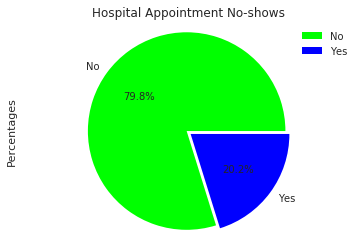

In [109]:
data["No_show"].value_counts().plot(kind="pie", colors=["lime", "blue"], autopct="%.1f%%", explode=(0, 0.05))
plt.ylabel('Percentages')
plt.title("Hospital Appointment No-shows")
plt.legend()
plt.axis('equal')
plt.show()

The dataset indicates that a little over 20% of patients did not attend their scheduled hospital appointments versus roughly 80% of patients who did attend their appointments. 

### Research Question 1: 
### Does gender play a role in no-shows, and if so, which gender is more likely to not attend their scheduled appointments?

#### Gender ratio in sample population:

In [235]:
#User defined function to avoid repeating code.
def proportion(attribute):
    return round(data[attribute].value_counts()/len(data)*100, 1)

In [230]:
proportion("Gender")

F    65.0
M    35.0
Name: Gender, dtype: float64

(-1.1120039602611391,
 1.1243482229675943,
 -1.159047246317538,
 1.1090490802288737)

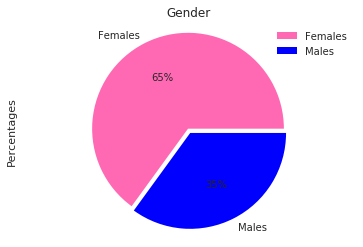

In [231]:
mylabels = ['Females', 'Males']
mycolors = ['hotpink', 'blue']

data["Gender"].value_counts().plot(kind="pie", labels = mylabels, colors = mycolors, explode = (0,0.05), autopct='%1.0f%%')
plt.ylabel('Percentages')
plt.title("Gender")
plt.legend()
plt.axis('equal')

The No-show Appointment dataset consists of 65% female and 35% male patients.

#### The proportion of gender and no-shows:

In [239]:
#User defined function to avoid repeating code.
def proportion_x_noshow(attribute_1, attribute_2):
    return data.groupby([attribute_1, attribute_2]).size()

In [241]:
#User defined function to avoid repeating code.
proportion_x_noshow("Gender", "No_show")

Gender  No_show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
dtype: int64

(-1.1124636012450362,
 1.1210428188583632,
 -1.132019406156825,
 1.1288077435482566)

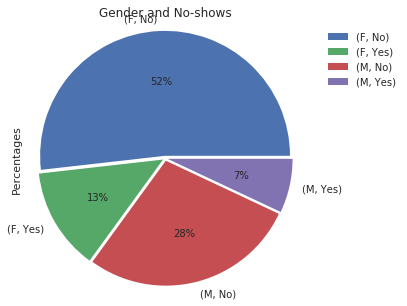

In [242]:
data.groupby(['Gender', 'No_show']).size().plot(kind='pie', figsize = (5, 5), explode = (.02, .02, .02, .02), autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel('Percentages')
plt.title("Gender and No-shows")
plt.axis('equal')

The No-show Appointment dataset consists of 52% of females that attended their scheduled appointments, whereas 13% of females did not attend their scheduled appointments.  Men attended their scheduled appointments 28% of the time, whereas 7% did not attend their scheduled appointments. 

### Research Question 2:
### Does age affect the rates of no-shows? Are elderly patients less likely to attend their appointments, or are younger patients less likely? Is there an intersection between age and gender that affects the outcomes of no-shows?

#### Age ratio in sample population:

In [41]:
unique_age = data["Age"].nunique()
print(f"There are {unique_age} unique age groups in the dataset.")

There are 103 unique age groups in the dataset.


In [114]:
#Source: https://www.appsloveworld.com/pandas/100/143/categorize-age-into-another-column-age-group
#Code to create bins to hold the 103 uniqe age groups.
bins=[0,12,18,55,80,120]
data["Age_group"] = pd.cut(data.Age, bins=bins)
Age_noshow = data.groupby("Age_group")["No_show"].value_counts()
Age_noshow

Age_group  No_show
(0, 12]    No         13829
           Yes         3668
(12, 18]   No          5790
           Yes         2040
(18, 55]   No         42487
           Yes        11669
(55, 80]   No         20818
           Yes         3834
(80, 120]  No          2383
           Yes          469
Name: No_show, dtype: int64

Text(0.5,1,'Age group and No-shows')

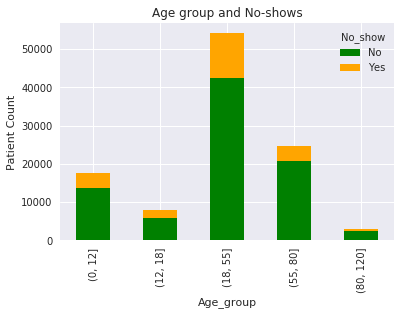

In [115]:
Age_noshow.unstack().plot(kind='bar', stacked=True, color=['green', 'orange'])
plt.ylabel('Patient Count')
plt.title("Age group and No-shows")

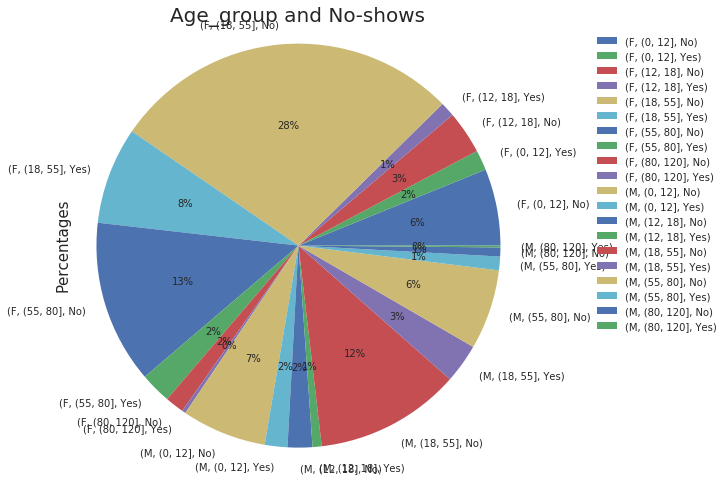

In [188]:
Age_noshow.plot(kind='pie', figsize = (8, 8), autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left')
plt.ylabel('Percentages', size='15')
plt.title("Age_group and No-shows", size='20')
plt.axis('equal')
plt.show()

Of the 103 unique age groups, the 18 to 55 age group had the highest percentage of no-show (11%) but also had the highest percentage of attendance rate at 41%.

#### The Intersection of Gender, Age, and No-show:

In [121]:
bins=[0,12,18,55,80,120]
data["Age_group"] = pd.cut(data.Age, bins=bins)
Age_noshow = data.groupby(['Gender', 'Age_group', 'No_show']).size()

In [122]:
Age_noshow 

Gender  Age_group  No_show
F       (0, 12]    No          6570
                   Yes         1731
        (12, 18]   No          3672
                   Yes         1260
        (18, 55]   No         30021
                   Yes         8305
        (55, 80]   No         13967
                   Yes         2663
        (80, 120]  No          1613
                   Yes          316
M       (0, 12]    No          7259
                   Yes         1937
        (12, 18]   No          2118
                   Yes          780
        (18, 55]   No         12466
                   Yes         3364
        (55, 80]   No          6851
                   Yes         1171
        (80, 120]  No           770
                   Yes          153
dtype: int64

Text(0.5,1,'Gender and Age group vs No-shows')

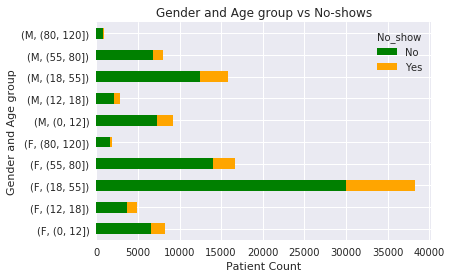

In [137]:
Age_noshow.unstack().plot(kind='barh', stacked=True, color=['green', 'orange', 'red'])
plt.ylabel('Gender and Age group')
plt.xlabel('Patient Count')
plt.title('Gender and Age group vs No-shows')

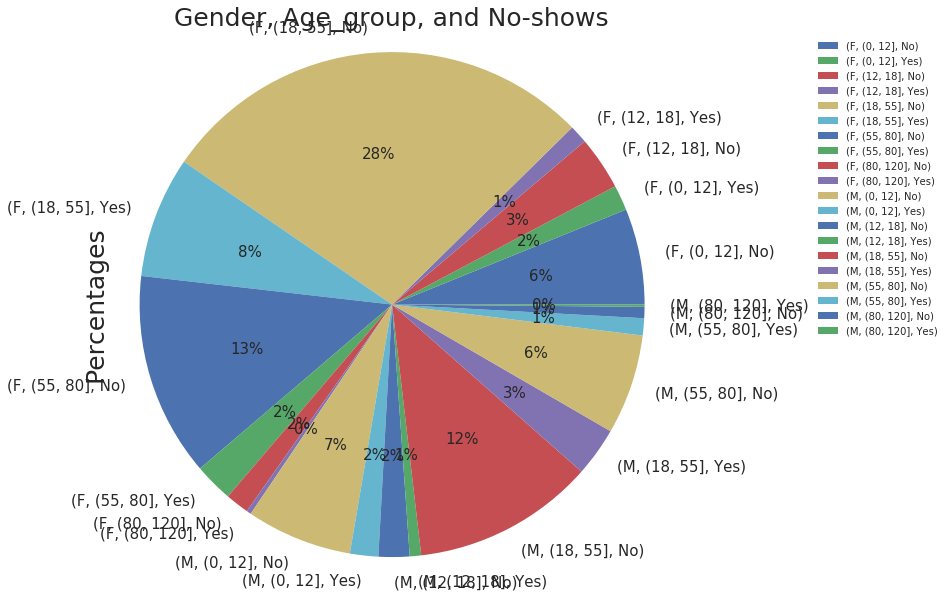

In [179]:
textprops = {"fontsize":15}
Age_noshow.plot(kind='pie', figsize=(10,10), autopct='%1.0f%%',textprops = textprops)
plt.legend(bbox_to_anchor=(1.25, 1.0), loc='upper left')
plt.ylabel('Percentages', size='25')
plt.title("Gender, Age_group, and No-shows", size='25')
plt.axis('equal')
plt.show()


The highest percentage of no-shows for both females and males fell into the 18 to 55 age groups with  8%  for females and 3% for males. 

### Research Question 3:
### Does scholarship (enrollment in the Bolsa Familia social welfare program) affect the likelyhood of no-shows, and does the intersection of gender and scholarship play a role?

#### The proportion of scholarship and no-shows:

In [236]:
#User defined function to avoid repeating code. 
proportion("Scholarship")

0    90.2
1     9.8
Name: Scholarship, dtype: float64

In [237]:
prop_of_scholarship = proportion("Scholarship")

(-1.1570444725978999,
 1.1526343642628234,
 -1.0924407692444469,
 1.1221406684693858)

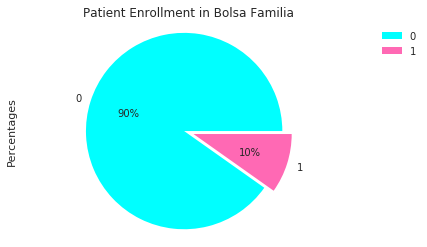

In [238]:
prop_of_scholarship.plot(kind = 'pie', explode = (0.05, 0.05), colors = ['cyan', 'hotpink'], autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel('Percentages')
plt.title("Patient Enrollment in Bolsa Familia")
plt.axis('equal')

Zero (0) indicates no enrollment in the Bolsa Familia Social welfare program, whereas one (1) indicates enrollment. Only 10% of patients were enrolled in the program, while 90% were not enrolled.

In [243]:
#User defined function to avoid repeating code.
proportion_x_noshow("Scholarship", "No_show")

Scholarship  No_show
0            No         79924
             Yes        19741
1            No          8283
             Yes         2578
dtype: int64

Text(0.5,1,'Scholarship vs No-show')

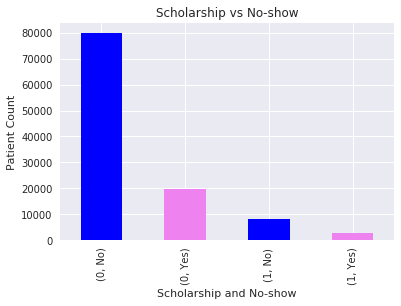

In [244]:
data.groupby(['Scholarship', 'No_show']).size().plot(kind='bar', color=['blue', 'violet'])
plt.ylabel('Patient Count')
plt.xlabel('Scholarship and No-show')
plt.title('Scholarship vs No-show')

(-1.1520234658512984,
 1.1547176932076706,
 -1.169531520303965,
 1.1605664453711753)

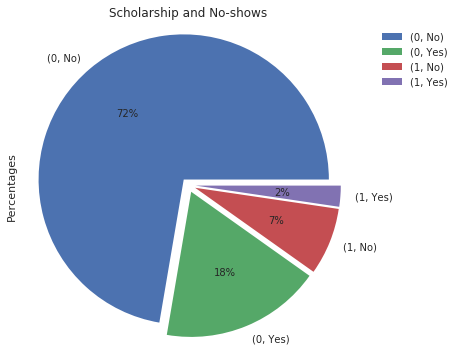

In [245]:
data.groupby(['Scholarship', 'No_show']).size().plot(kind='pie', figsize = (6, 6), explode = (.05, .05, .05, .05), autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel('Percentages')
plt.title("Scholarship and No-shows")
plt.axis('equal')

Most patients in the data set are not enrolled in the Bolsa Familia social welfare program (90.2% enrolled vs 9.8% not enrolled). Of the 110,526 appointments, 79,924 or 72% of patients not enrolled in Bolsa Famila attended their appointments, whereas 19,741 or 18% of patients not enrolled in Bolsa Familia missed their scheduled appointments. There were only 10,861 patients that were enrolled in Bolsa Familia. Out of the patients enrolled, 8,283 or 7% of patients attended their appointments, whereas 2,578 or 2% of patients missed their scheduled appointments.  

#### The Intersection of Scholarship, Gender, and No-show:

In [103]:
data.groupby(['Scholarship', 'Gender', 'No_show']).size()

Scholarship  Gender  No_show
0            F       No         50498
                     Yes        12488
             M       No         29426
                     Yes         7253
1            F       No          6747
                     Yes         2106
             M       No          1536
                     Yes          472
dtype: int64

Text(0.5,1,'Scholarship and Gender vs No-show')

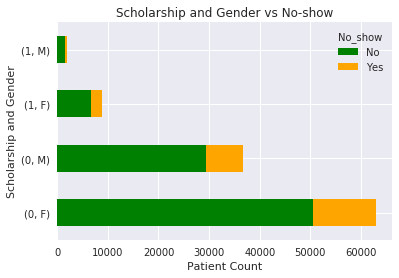

In [112]:
data.groupby(['Scholarship', 'Gender', 'No_show']).size().unstack().plot(kind='barh', stacked=True, color=['green', 'orange', 'red'])
plt.ylabel('Scholarship and Gender')
plt.xlabel('Patient Count')
plt.title('Scholarship and Gender vs No-show')

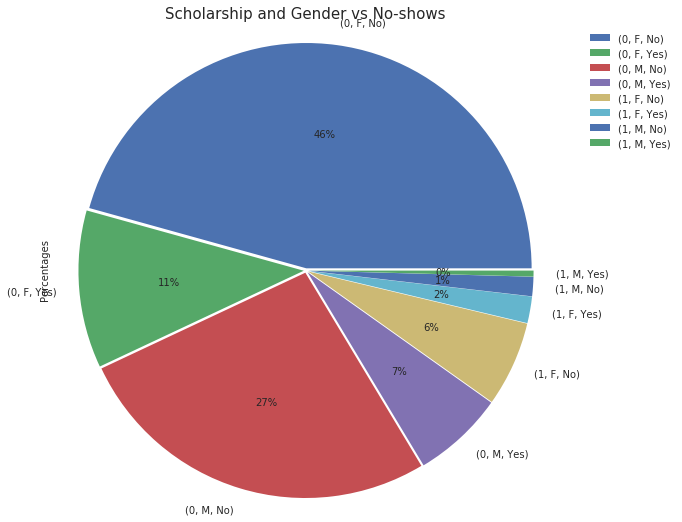

In [210]:
data.groupby(['Scholarship', 'Gender', 'No_show']).size().plot(kind = 'pie', figsize = (9, 9), explode = (0.01,0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01), autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel('Percentages', size='10')
plt.title("Scholarship and Gender vs No-shows", size='15')
plt.axis('equal')
plt.show()


Looking at the intersection of gender, scholarship and no-shows, the data suggests that patients not enrolled in the Bolsa Familia social welfare program were more likely to miss their scheduled appointments. There were 12,488 or 11% of female patients that missed their scheduled appointments, as opposed to 7,253 or 7% of male patients. Both female and male patients that were enrolled in the Bolsa Familia social welfare program had a higher likelihood of showing up to their scheduled appointments. 

<a id='conclusions'></a>
## Conclusions:

>The No-show Appointments dataset contains 62,299 unique patients with over 110,000 appointments, indicating that individual patients had multiple appointments. The analysis of the dataset considers multiple research questions targeting why patients missed their scheduled appointments:
1.	Does gender play a role in no-shows, and if so, which gender is more likely to fail to attend their scheduled appointments?
2.	Does age affect the rates of no-shows? Are elderly patients less likely to attend their appointments, or are younger patients less likely? Is there an intersection between age and gender that affects the outcomes of no-shows?
3.	Does scholarship (enrollment in the Bolsa Familia social welfare program) affect the likelihood of no-shows, and does the intersection of gender and scholarship play a role?

>The No-show Appointments analysis begins by looking at the proportion of hospital appointments scheduled versus how many were no-shows. Out of the 110,527 appointments, 79.8% of patients successfully attended the appointments, whereas only 20.2% did not attend. The analysis of this dataset is to reveal factors contributing to why one out of five patients failed to attend their scheduled appointments. 

>The first research question explores the role of gender in appointment no-shows. Which gender is more likely to miss their scheduled appointments? 

>The analysis finds that females composed 65% of the dataset, whereas males composed 35%. Females were more likely to miss their appointments compared to males. Females missed their appointments 13% of the time, whereas males missed their appointments 7% of the time. 

>The second research question examines the age of patients on the rates of no-shows. Did a certain age group miss more appointments? Next, the intersection of age and gender vs no-shows was considered. 

>The dataset consists of 103 unique age groups, which are divided into five groups (0 to 12, 13 to 17, 18 to 54, 55 to 79, and 80 to 120). The 18 to 55 age group has the highest no-show rate of 11% or 11,669 patients. Examining the intersection of gender, age group, and no-shows, the 11% of patients that missed their appointments consisted of 8% females and 3% males.

>The third research question investigates the relationship between patients enrolled in the Bolsa Familia social welfare program (scholarship) and the rate of no-shows. A little over 90% of patients in the dataset are not enrolled in the program, whereas 9.8% of patients are enrolled in the program. Delving deeper into the analysis, the data suggests there is a significant increase in patients missing their appointments if they are not enrolled in the program. Of the patients not enrolled, 19,741, or 18% missed their appointments. Looking at the patients that are enrolled in the program, only 2,578, or 2% missed their appointments. Considering the intersection of scholarship, gender, and no-shows, there were 12,488 or 11% of females that failed to attend their appointments compared to 7,253 or 7% of male patients. 

> In conclusion, female patients are more likely to miss their scheduled appointments compared to male patients. The age group to miss the most scheduled appointments is the 18 to 55 age group. Again, female patients comprise 8% of the group, whereas male patients account for 3%. The largest factor in why patients miss their scheduled appointments is their participation in the Bolsa Familia social welfare program. Of the patients enrolled in the program, only 2% missed their appointments compared to patients not enrolled in the program who missed 18% of their appointments. There is a difference of 16% between the enrolled group and the non-enrolled group, suggesting that more patients miss their scheduled appointments due to economic reasons. 











### Limitations:
> The No-show Appointments analysis has two major limitations: there are multiple appointments made by the same patients, so did patients overschedule appointments, either knowingly or accidentally, and then forget to cancel the second appointment? Secondly, female patients contribute to missed appointments, but in most cultures, females play a significant role in taking care of the family, caring for the elderly, and domestic duties. Further analysis is needed to understand the role females play and how their obligations could interfere with attending their scheduled appointments. 

> A recommendation for further studies would be to add transportation to the attributes under study. Transportation plays a significant role in patients getting to their scheduled appointments, either through public transportation, owning their vehicles, or social services offering transportation services. 




## Sources used:

> Pandas: https://pandas.pydata.org/docs/

> Matplotlib: https://matplotlib.org/stable/index.html

> NumPy: https://numpy.org/doc/

> Seaborn: https://seaborn.pydata.org/

> GeeksforGeeks: https://www.geeksforgeeks.org/pandas-tutorial/

> W3Schools: https://www.w3schools.com/python/pandas/default.asp

> Appsloveworld: https://www.appsloveworld.com/pandas/100/143/categorize-age-into-another-column-age-group

In [246]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0